# Probabilistic Modeling



In this exercise, we will train a [Naive Bayes Classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier). We will
* make prior assumptions as for the distribution of our data; and
* train a model to find the best parameters for that distribution

Let's see how it works:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline

%matplotlib inline

We will use some email data which we will classify as **spam** or not.

In [ ]:
df_emails = pd.read_csv('https://raw.githubusercontent.com/liadmagen/Modeling_course/main/data/spam_or_not_spam.csv', encoding="UTF-8")
df_emails.tail()

,email,label
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1
2999,hello this is chinese traditional 子 件 NUMBER世...,1


Let's divide the data into [**training** and **test** sets](https://builtin.com/data-science/train-test-split)

In [ ]:
############## YOUR TURN ##############
# Divide the data into training and test set using sklearn's train_test_split.
# use the colunm 'email' for the training data
# use the column 'label' as the target y

X_train, X_test, y_train, y_test = train_test_split(
    df_emails['email'], df_emails['label'], test_size=0.2, random_state=42
)

########################################

We are going to use some NLP-specific methods here. Machine Learning Models are expecting numerical values as their input.

Therefore, we must process the text a bit - transforming every word to some fraction, based on their frequency.   
This score represents how unique the word is, based on their appearance count in the whole dataset.

We will use a [Naive Bayes, assuming a Multinomial distribution](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html), and put it in a data processing [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

In [ ]:
# Create Pre-processing pipeline and a Multinomial Naive Bayes classifier.

# CountVectorizer calculates the frequency of words in the dataset (how often they appear)
# TfidfTransformer calculates the frequency of a word in this document, divided by their frequency over ALL the documents.

## MultinomialNB is a Naive Bayes classifier assuming a multinomial distribution
spam_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()), ])


And we train:

In [ ]:
spam_classifier.fit(X_train.values.astype('U'), y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

Now that we have a classifier - let's filter some spam!!!

In [ ]:
y_preds = spam_classifier.predict(X_test.values.astype('U'))


How well did we do?

We can test our model results of the test set using different metrics from the sklearn metrics package.

For example, the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) which calculates precision, recall, f1-score and accuracy:

In [ ]:
print(metrics.classification_report(y_test, y_preds, target_names=["Spam","Not Spam"]))

              precision    recall  f1-score   support

        Spam       0.87      1.00      0.93       505
    Not Spam       1.00      0.19      0.32        95

    accuracy                           0.87       600
   macro avg       0.93      0.59      0.62       600
weighted avg       0.89      0.87      0.83       600



Pay attention to the results. Our dataset is not balanced, hence we have large differences between the different f1-scores.

If we plot a confusion table, we can clearly see that we didn't do so well, despite the high f1-score:

<Axes: >

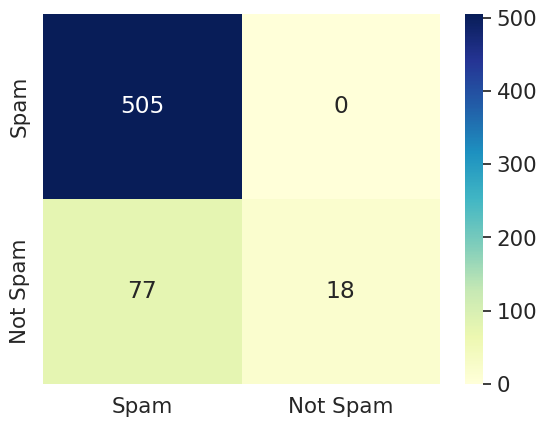

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_preds)
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")


This is one of the reasons that the [Mathew's Correlation Coefficients](https://www.statisticshowto.com/matthews-correlation-coefficient/) is such a good alternative to the F1-Score:

In [ ]:
print(metrics.matthews_corrcoef(y_test, y_preds))

0.4054699249153405


# Can we do better?

Let's try it again - this time with another inductive bias - we will assume the distribution of the text is of [`ComplementNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)

---
## Your turn:

Create a pipeline with a [Complement Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes), which fits better imbalanced classes, and train it on our dataset.

Check your results on the test-set and plot a confussion matrix.

How did your new model do?

              precision    recall  f1-score   support

    Not Spam       0.91      1.00      0.95       505
        Spam       1.00      0.46      0.63        95

    accuracy                           0.92       600
   macro avg       0.95      0.73      0.79       600
weighted avg       0.92      0.92      0.90       600



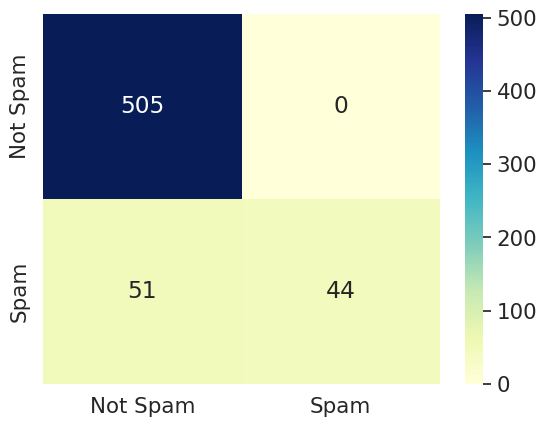

In [ ]:
### Your turn ###

## CREATE THE PIPELINE:
# We use the Pipeline to combine the necessary preprocessing steps and the ComplementNB classifier. This pipeline simplifies the process of applying transformations and training the model.
spam_classifier_cnb = Pipeline([
    ('vect', CountVectorizer()),    # Converts text to bag-of-words representation
    ('tfidf', TfidfTransformer()),  # Applies TF-IDF weighting to the word frequencies
    ('clf', ComplementNB())         # Complement Naive Bayes classifier
])


## TRAIN THE MODEL:
# We fit the pipeline on the training data. This will preprocess the data (vectorization and TF-IDF) and train the ComplementNB classifier.
spam_classifier_cnb.fit(X_train.values.astype('U'), y_train)


## TEST THE MODEL
# We predict the test set labels using the trained pipeline.
y_preds_cnb = spam_classifier_cnb.predict(X_test.values.astype('U'))


## EVALUATE THE MODEL - CLASSIFICATION REPORT:
print(metrics.classification_report(y_test, y_preds_cnb, target_names=["Not Spam", "Spam"]))


## CONFUSION MATRIX
conf_mat_cnb = metrics.confusion_matrix(y_test, y_preds_cnb)
df_cm_cnb = pd.DataFrame(conf_mat_cnb, ["Not Spam", "Spam"], ["Not Spam", "Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm_cnb, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

##################

## Or even better

There is one major problem with the Naive-Bayes model:

If a word did not exist during the training, it was never counted. If such a word suddenly appear during inference, it will cause a division by 0 (the posterior - the previous observation is 0).

Think about it for a moment: in spam messages, we ALWAYS have newly invented words! Spam senders are trying to trick the spam-detector model by changing letters (i=!) to alter existing words to new words.

### How can we overcome this?

One way to solve it is called the "Add-one Smoothing", where we add one (1) to both the denominator and numerator. But this smoothing value doesn't have to be 1. We can change this value to *any* positive number, even fractions!

$P(w | positive) = \frac{number of samples with w and y = positive + \alpha}{N+\alpha * K}$

Try playing with the Additive (also called Laplace/Lidstone) smoothing parameter of the MultinomialNB or the ComplementNB.  
The parameter is named **alpha** in the scikit-learn implementation.

Challenge yourself: Can you score above 95%? above 98%? above 99%?

Or even better - can you automate the search of this hyperparameter using a [grid or a random search?](https://scikit-learn.org/stable/modules/grid_search.html)

In [ ]:
## TUNNING ComplementNB WITH GRID SEARCH:
# I needed to help myself here with the AI because the grid search isn't very clear for me.

from sklearn.model_selection import GridSearchCV
param_grid = {'clf__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

grid_search_cnb = GridSearchCV(
    Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', ComplementNB())]),
    param_grid, cv=5, scoring='f1_macro'
)
grid_search_cnb.fit(X_train.values.astype('U'), y_train)
print("Best Parameters (ComplementNB):", grid_search_cnb.best_params_)


Best Parameters (ComplementNB): {'clf__alpha': 0.1}


In [ ]:
print(metrics.matthews_corrcoef(y_test, y_preds))

0.4054699249153405


# Diving deeper

To dive deeper into the topic and to observe more examples, please consider [reading or watching this article](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote05.html)

## Bonus: Try another model

Try comparing your achieved results with another model (kNN, Decision Tree, Random Forest). Hint: you'll need to still use the TFIDF.

Which model yield the best results?

In [ ]:
## COMPARING ComplementNB WITH OTHER MODELS:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## DECISION TREE

# Defining pipeline
decision_tree_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Train and evaluate Decision Tree
decision_tree_pipeline.fit(X_train.values.astype('U'), y_train)
y_preds_dt = decision_tree_pipeline.predict(X_test.values.astype('U'))
print("Decision Tree Classification Report:")
print(metrics.classification_report(y_test, y_preds_dt, target_names=["Not Spam", "Spam"]))

Decision Tree Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.98      0.97      0.98       505
        Spam       0.87      0.89      0.88        95

    accuracy                           0.96       600
   macro avg       0.92      0.93      0.93       600
weighted avg       0.96      0.96      0.96       600



In [ ]:
## RANDOM FOREST:

# Defining pipeline:
rf_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Train and evaluate Random Forest
rf_pipeline.fit(X_train.values.astype('U'), y_train)
y_preds_rf = rf_pipeline.predict(X_test.values.astype('U'))
print("Random Forest Classification Report:")
print(metrics.classification_report(y_test, y_preds_rf, target_names=["Not Spam", "Spam"]))

Random Forest Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.98      1.00      0.99       505
        Spam       1.00      0.88      0.94        95

    accuracy                           0.98       600
   macro avg       0.99      0.94      0.96       600
weighted avg       0.98      0.98      0.98       600



In [ ]:
## k-NEAREST NEIGHBORS:

# Defining pipeline:
knn_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier())
])

# Train and evaluate kNN
knn_pipeline.fit(X_train.values.astype('U'), y_train)
y_preds_knn = knn_pipeline.predict(X_test.values.astype('U'))
print("k-Nearest Neighbors Classification Report:")
print(metrics.classification_report(y_test, y_preds_knn, target_names=["Not Spam", "Spam"]))

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.99      0.84      0.91       505
        Spam       0.53      0.97      0.68        95

    accuracy                           0.86       600
   macro avg       0.76      0.90      0.79       600
weighted avg       0.92      0.86      0.87       600



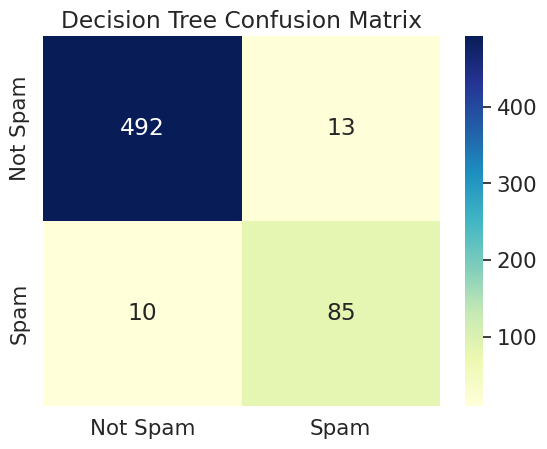

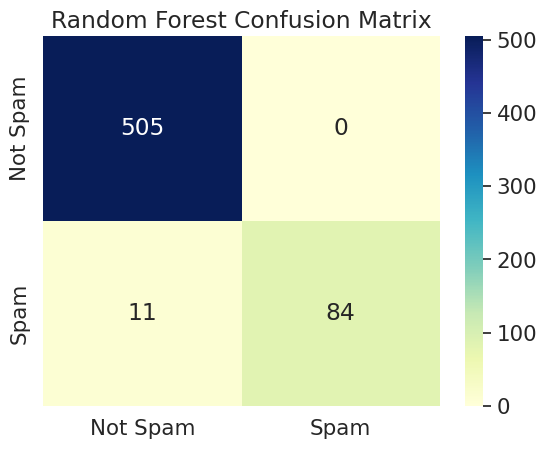

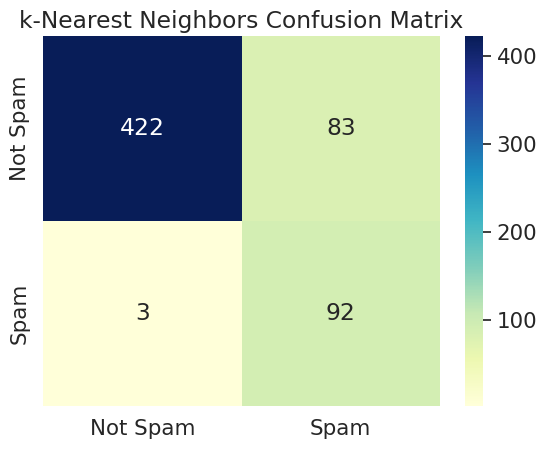

In [ ]:
## COMPARE CONFUSION MATRICES:

# Plot confusion matrices for each model
def plot_confusion_matrix(y_true, y_pred, title):
    conf_mat = metrics.confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(conf_mat, ["Not Spam", "Spam"], ["Not Spam", "Spam"])
    sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_preds_dt, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, y_preds_rf, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, y_preds_knn, "k-Nearest Neighbors Confusion Matrix")

In [ ]:
## CALCULATE METRICS:
# I also used AI here - in order to make the solution more compact, it proposed to create a funciton and then apply this to each model.

from sklearn.metrics import classification_report, matthews_corrcoef

def calculate_metrics(y_true, y_pred, model_name):
    # Generate the classification report
    report = classification_report(y_true, y_pred, output_dict=True, target_names=["Not Spam", "Spam"])

    # Calculate Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred)

    # Extract metrics
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    support = len(y_true)  # Total number of samples in the test set

    # Return as a dictionary
    return {
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "MCC": mcc
    }

results = []
results.append(calculate_metrics(y_test, y_preds_cnb, "ComplementNB"))  # Complement Naive Bayes
results.append(calculate_metrics(y_test, y_preds_dt, "Decision Tree"))  # Decision Tree
results.append(calculate_metrics(y_test, y_preds_rf, "Random Forest"))  # Random Forest
results.append(calculate_metrics(y_test, y_preds_knn, "kNN"))           # k-Nearest Neighbors

# Convert results to a DataFrame
import pandas as pd
metrics_df = pd.DataFrame(results)
print(metrics_df)


           Model  Precision    Recall  F1-Score  Support       MCC
0   ComplementNB   0.922797  0.915000  0.901449      600  0.648594
1  Decision Tree   0.962230  0.961667  0.961907      600  0.858143
2  Random Forest   0.982057  0.981667  0.981202      600  0.930248
3            kNN   0.918964  0.856667  0.871736      600  0.645781


After running the cell above, the results show that the best results has Random Forest model. It scored the best results in all metrics, while the last one shows the MCC score. This should be the most precise one in this case, because we are dealing with an imbalanced dataset. When taking look at f.e. ComplementNB model, it shows quite high scores in the first three scores, but when calculating the MCC score, we see that this model (along with kNN model) scored the worst results. The calculation of MCC scores is really worth it!

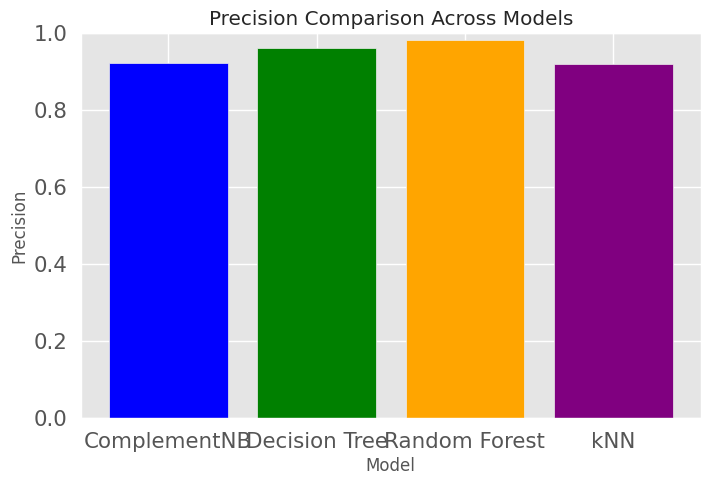

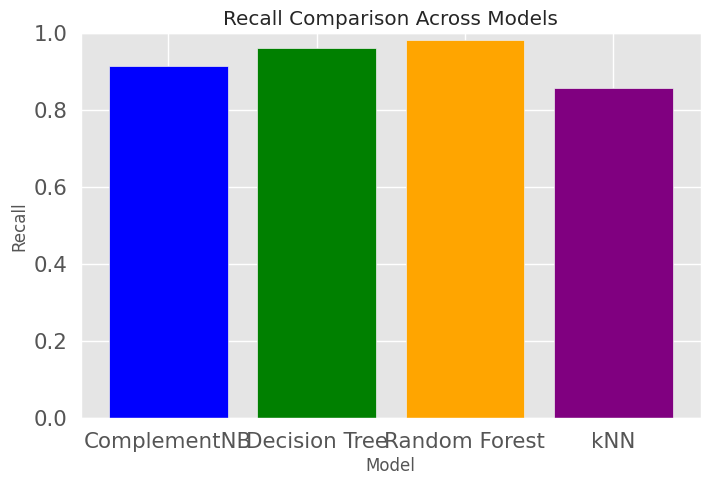

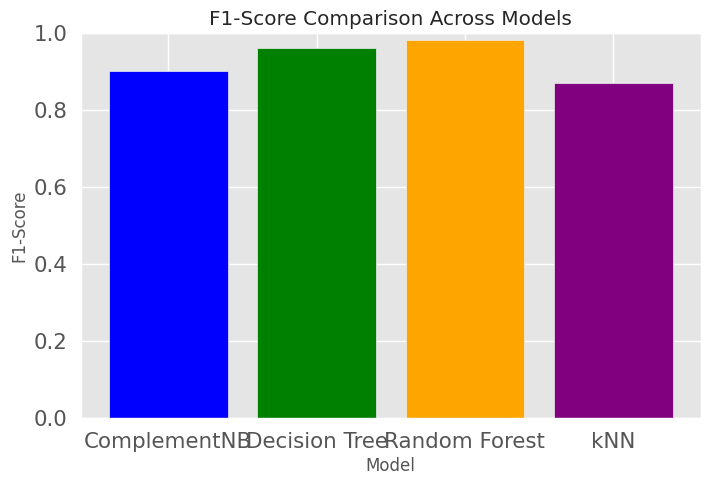

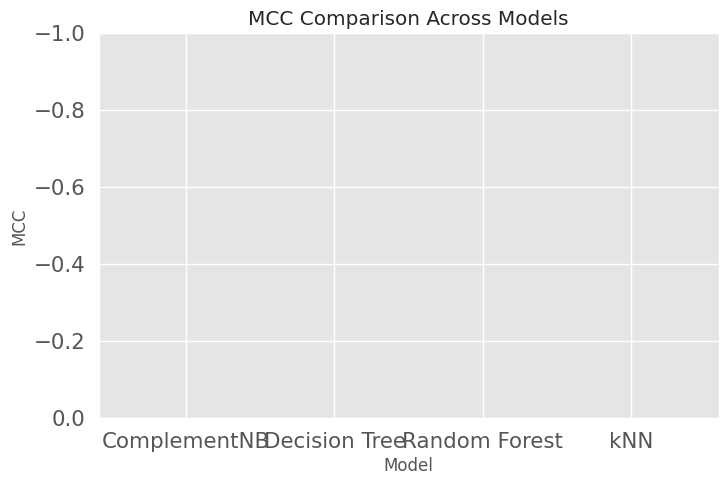

In [ ]:
## VISUALIZE RESULTS:
# I still have problems with codes which are creating graphs.

# Use built-in Matplotlib style
plt.style.use("ggplot")

# Bar plot for Precision, Recall, F1-Score, and MCC
metrics_to_plot = ["Precision", "Recall", "F1-Score", "MCC"]

for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    plt.bar(metrics_df["Model"], metrics_df[metric], color=['blue', 'green', 'orange', 'purple'])
    plt.title(f"{metric} Comparison Across Models")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.ylim(0, 1 if metric != "MCC" else -1)
    plt.show()
